# Manufacturing Dataset - Dimension reduction and ML model.
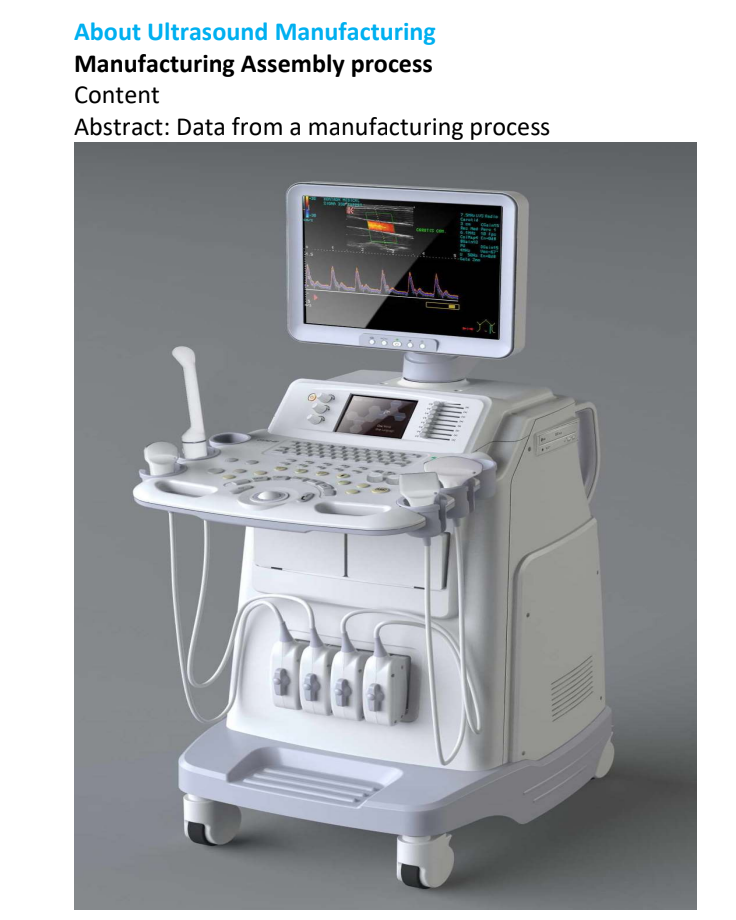
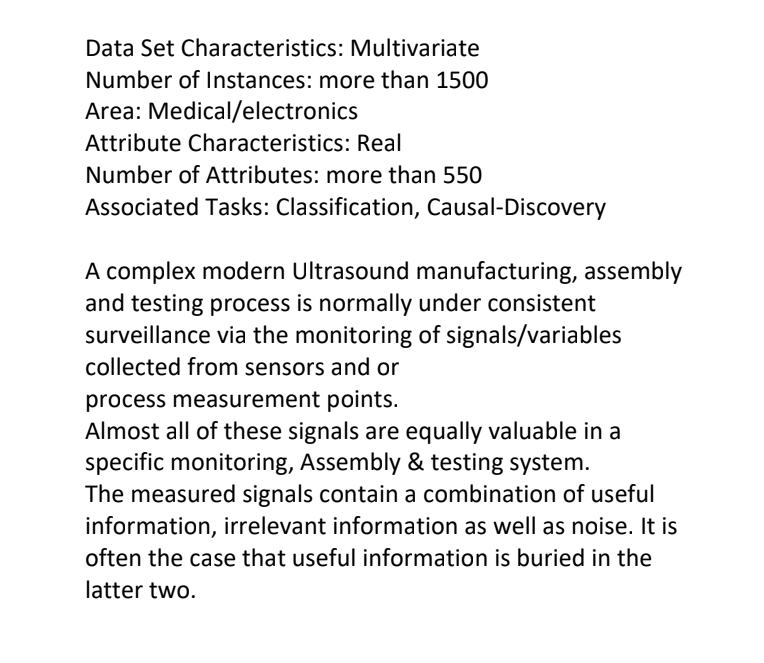
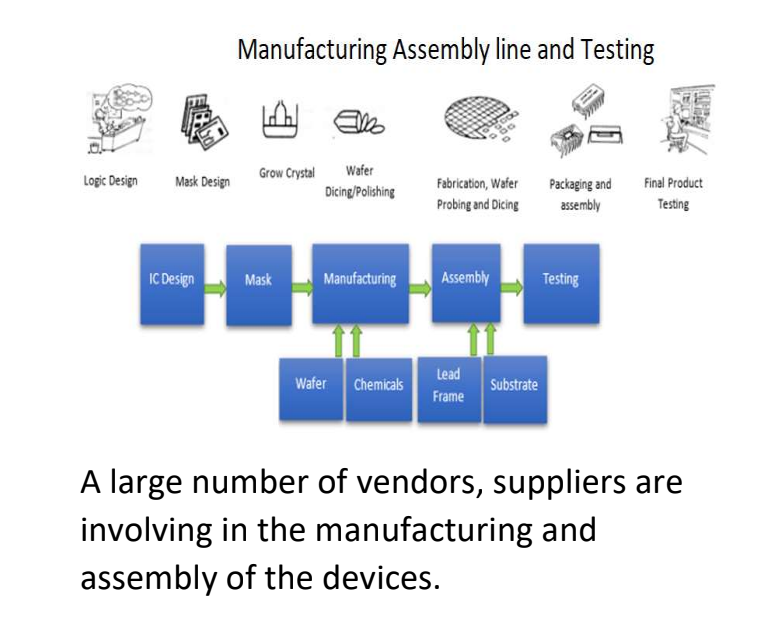
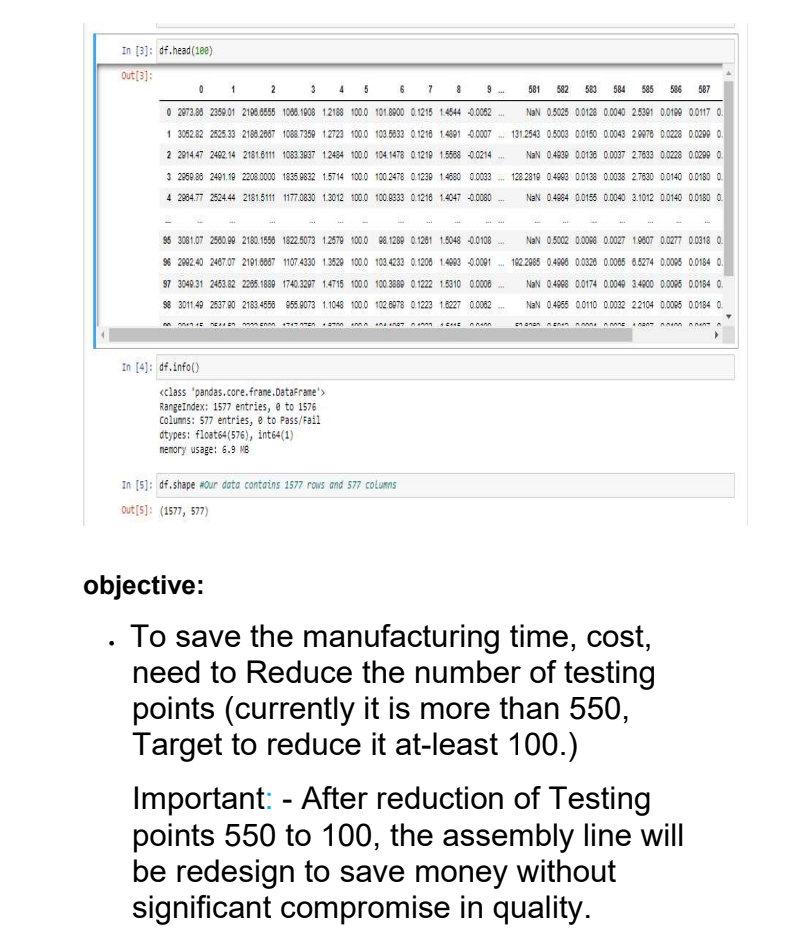
## How do we reduce these features?
### Can we use PCA here? No. why? because PCA reduces the features uses feature extraction. It clubs existing featres together to create new features, drops unnecessary data(that is random data points in columns even), removes low variance data. After PCA, the features we have are not recognizable or differentiable as compared to the original dataset. This is why we cannot use PCA because at the end we will not be able to tell which features should be removed for cost-cutting without affecting the accuracy by much.
### Instead we will use multicolinearity, high variance influence (high vif), featrue importance etc. and slowly reduce the columns.

### What is a balanced dataset and an imbalanced dataset? An imbalanced dataset is where target classes are imbalanced, ie one particular class is very high. The problem that comes due to imbalanced datasets is that lets say we have 900  '0' out of 1000 data and 100 '1' in some healthcare classification dataset. Let's say machine after training gives an accuracy of 90-91%. That is a good accuracy right? but what if the recall percentage for '1' is 10-20%? this might happen because the model is only predicting '0' correctly and hence even for '1', it is mostly predicting 0. This is a problem and to sole this, we need to do some hyper parameter tuning. Therefore we should always call the confusion matrix and classification report to check for these mistakes. Only Accuracy does not give the complete information.
### Minority class recall is also important. And when to give importance to recall and when to precision, all these are important factors.
## MOST DATASETS in real word have a 90-10, 95-5 kind of CLASSIFICATION ie they are unbalanced datasets.


In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
original_data = pd.read_csv('Ultrasound_1.csv')
original_data
#the column names are not mentioned since this kind of data can be confidential
#therefore we will refer them as numbers only.

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,...,NaN,0.5025,0.0128,0.0040,2.5391,0.0199,0.0117,0.0043,58.5665,1
1,3052.82,2525.33,2186.2667,1088.7359,1.2723,100.0,103.5633,0.1216,1.4891,-0.0007,...,131.2543,0.5003,0.0150,0.0043,2.9976,0.0228,0.0299,0.0105,131.2543,-1
2,2914.47,2492.14,2181.6111,1083.3937,1.2484,100.0,104.1478,0.1219,1.5568,-0.0214,...,NaN,0.4939,0.0136,0.0037,2.7633,0.0228,0.0299,0.0105,131.2543,-1
3,2959.86,2491.19,2208.0000,1835.9832,1.5714,100.0,100.2478,0.1239,1.4680,0.0033,...,128.2819,0.4993,0.0138,0.0038,2.7630,0.0140,0.0180,0.0054,128.2819,1
4,2964.77,2524.44,2181.5111,1177.0830,1.3012,100.0,100.9333,0.1216,1.4047,-0.0080,...,NaN,0.4984,0.0155,0.0040,3.1012,0.0140,0.0180,0.0054,128.2819,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,2855.80,2637.35,2183.4333,1582.5646,1.3666,100.0,99.0267,0.1240,1.4912,-0.0004,...,69.4220,0.5011,0.0122,0.0032,2.4250,0.0218,0.0152,0.0050,69.4220,-1
1573,2940.22,2417.85,2246.4899,1006.9548,1.0997,100.0,103.3222,0.1184,1.5218,-0.0283,...,59.2072,0.4984,0.0137,0.0042,2.7521,0.0180,0.0106,0.0030,59.2072,-1
1574,2971.99,2522.62,2239.3000,1192.7495,1.2499,100.0,100.1189,0.1187,1.5824,-0.0006,...,15.2909,0.4955,0.0094,0.0031,1.8952,0.0278,0.0042,0.0016,15.2909,1
1575,2948.53,2459.87,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,1.5877,-0.0108,...,NaN,0.5003,0.0234,0.0053,4.6768,0.0278,0.0042,0.0016,15.2909,-1


In [3]:
df = original_data.copy()
df.shape

(1577, 577)

In [4]:
df.size

909929

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Columns: 577 entries, 0 to Pass/Fail
dtypes: float64(576), int64(1)
memory usage: 6.9 MB


In [6]:
df.head()
#To see all cols or rows: pd.set_option('display.max_columns', x)

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,...,NaN,0.5025,0.0128,0.0040,2.5391,0.0199,0.0117,0.0043,58.5665,1
1,3052.82,2525.33,2186.2667,1088.7359,1.2723,100.0,103.5633,0.1216,1.4891,-0.0007,...,131.2543,0.5003,0.0150,0.0043,2.9976,0.0228,0.0299,0.0105,131.2543,-1
2,2914.47,2492.14,2181.6111,1083.3937,1.2484,100.0,104.1478,0.1219,1.5568,-0.0214,...,NaN,0.4939,0.0136,0.0037,2.7633,0.0228,0.0299,0.0105,131.2543,-1
3,2959.86,2491.19,2208.0000,1835.9832,1.5714,100.0,100.2478,0.1239,1.4680,0.0033,...,128.2819,0.4993,0.0138,0.0038,2.7630,0.0140,0.0180,0.0054,128.2819,1
4,2964.77,2524.44,2181.5111,1177.0830,1.3012,100.0,100.9333,0.1216,1.4047,-0.0080,...,NaN,0.4984,0.0155,0.0040,3.1012,0.0140,0.0180,0.0054,128.2819,1


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1572.000000,1570.000000,1563.000000,1563.000000,1563.000000,1563.0,1563.000000,1568.000000,1575.000000,1575.000000,...,625.000000,1576.000000,1576.000000,1576.000000,1576.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000
mean,3014.643575,2495.733197,2200.433938,1394.859291,4.179117,100.0,101.119802,0.121819,1.463007,-0.000961,...,98.136138,0.500124,0.015014,0.003782,3.004403,0.021380,0.016443,0.005273,99.824653,-0.866836
std,73.861303,80.115130,29.427118,441.146416,56.175293,0.0,6.214850,0.008937,0.073936,0.015102,...,87.326373,0.003371,0.012574,0.002704,2.614933,0.012313,0.008820,0.002867,93.718244,0.498752
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.082500,2453.272500,2181.044400,1081.875800,1.017700,100.0,98.012750,0.121100,1.411250,-0.010800,...,46.457300,0.497900,0.011600,0.003100,2.307550,0.013400,0.010600,0.003300,44.368600,-1.000000
50%,3011.095000,2499.570000,2200.988900,1283.436800,1.315000,100.0,101.566700,0.122350,1.461500,-0.001400,...,72.023000,0.500200,0.013700,0.003600,2.753000,0.020500,0.014800,0.004600,71.778000,-1.000000
75%,3057.037500,2538.500000,2218.055500,1590.169900,1.525700,100.0,104.525550,0.123800,1.517100,0.008200,...,117.615900,0.502400,0.016425,0.004100,3.292175,0.027500,0.020300,0.006400,116.108800,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.134000,1.656400,0.074900,...,737.304800,0.509800,0.471400,0.103900,98.662800,0.102800,0.079900,0.028600,737.304800,1.000000


In [8]:
#finding the missing values
df.isnull().sum().sum()

42093

In [9]:
#finding the percentage of missing values in columns
null_values = df.isnull().sum().sort_values(ascending = False)
null_percent = null_values/df.shape[0] * 100
null_data = pd.concat([null_values, null_percent], axis = 1, keys = ['Total_Null_Values', 'Percentage_Null_Values'])
null_data

,Total_Null_Values,Percentage_Null_Values
293,1439,91.249207
292,1439,91.249207
157,1439,91.249207
158,1439,91.249207
358,1351,85.668992
...,...,...
120,0,0.000000
156,0,0.000000
495,0,0.000000
494,0,0.000000


### for missing data over 60%, we can drop these columns because filling them is not an option.

In [10]:
#creating this into a dataframe is not necessary but you can do it if you want to
null_data.head(25)

,Total_Null_Values,Percentage_Null_Values
293,1439,91.249207
292,1439,91.249207
157,1439,91.249207
158,1439,91.249207
358,1351,85.668992
492,1351,85.668992
85,1351,85.668992
220,1351,85.668992
384,1028,65.187064
382,1028,65.187064


In [11]:
#finding columns with missing data over 60%
drop_missing_features = null_data[null_data['Percentage_Null_Values'] > 60].index
len(drop_missing_features)

24

In [12]:
# feature reduction part 1
#dropping columns with missing data over 60%
df.drop(columns = drop_missing_features, axis = 1, inplace = True)
df.isnull().sum().sum()
#about 2/3 of missing values have been handled and 24/577 features dropped

14789

In [13]:
#applying a general approach to fill the rest of the missing values 
#using median
df.fillna(df.median(), inplace = True)
df.isnull().sum().sum()

0

In [14]:
#No missing value left.

In [15]:
df['Pass/Fail'].value_counts()

Pass/Fail
-1    1472
 1     105
Name: count, dtype: int64

In [16]:
#finding percentage of target distribution
class_pass_per = df['Pass/Fail'].value_counts()[-1]/df.shape[0] * 100
class_fail_per = df['Pass/Fail'].value_counts()[1]/df.shape[0] * 100
print(class_fail_per, '\n', class_pass_per)

6.658211794546608 
 93.3417882054534


In [17]:
#OR YOU CAN ALSO DO THIS
df['Pass/Fail'].value_counts(normalize = True)

Pass/Fail
-1    0.933418
 1    0.066582
Name: proportion, dtype: float64

In [18]:
#replace -1 with 0 for easy ML, also this is the standard in the industry
df['Pass/Fail'] = df['Pass/Fail'].map({-1:0, 1:1})

In [19]:
df['Pass/Fail'].value_counts(normalize = True)

Pass/Fail
0    0.933418
1    0.066582
Name: proportion, dtype: float64

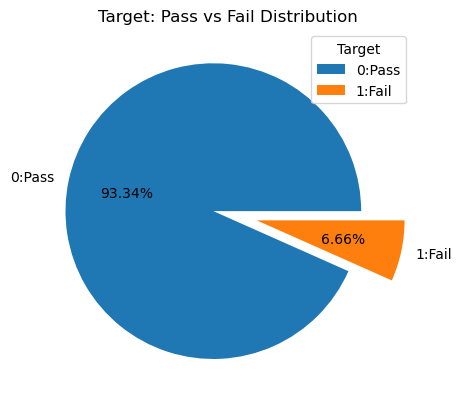

In [20]:
#percentage of pass/fail in Pie diagram
plt.pie(df['Pass/Fail'].value_counts(), autopct = '%.2f%%', labels = ['0:Pass', '1:Fail'], explode =[0.1, 0.2]);
plt.title('Target: Pass vs Fail Distribution')
plt.legend(title = 'Target', loc = 'upper right')

### It is highly imbalanced dataset

In [21]:
df1 = df.copy()

In [22]:
# feature reduction part 2
#drop columns having zero variance (ie only one unique variable)

In [23]:
one_unique = df1.apply(pd.Series.nunique)
one_unique

0            1489
1            1497
2             502
3             512
4             502
             ... 
586           319
587           256
588           119
589           602
Pass/Fail       2
Length: 553, dtype: int64

In [24]:
#finding columns with only one unique value
const_cols = one_unique[one_unique == 1].index
const_cols

Index(['5', '42', '141', '178', '179', '186', '226', '229', '230', '231',
       ...
       '529', '530', '531', '532', '533', '534', '535', '536', '537', '538'],
      dtype='object', length=104)

In [25]:
const_cols.shape

(104,)

In [26]:
#dropping one nique value cols (due to zero variance)
df1.drop(columns = const_cols, axis = 1, inplace = True)

In [27]:
df1.shape

(1577, 449)

In [28]:
df.shape

(1577, 553)

In [29]:
original_data.shape

(1577, 577)

In [30]:
#feature reduction part 3
#using correlation : multi collinearity within columns

In [31]:
#splitting data into dependent and independent variables
X = df1.drop(['Pass/Fail'], axis = 1)
Y = df1['Pass/Fail']

In [32]:
# let's do the scaling
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
#when we have a few outliers in some columns in our dataset, it is better to 
#apply RobustScaler to those columns and to the other columns apply MinMaxScaler
#StandardScaler is not a good idea here because there are a lot of columns and
#we do not know whether the data is linearly distributed or not. Using 
#StandardScaler is a good idea when we know the data is linearly distributed 
#because it uses z-score values.
#RobustScaler is best to handle outliers in a particular column or when the entire
#dataset has a lot of outliers.
#MinMaxScaler works fine, whether data is linearly distributed or not or in case
#there are some outliers present. Therefore when you are not sure, use this.
#If you want to get the best results, apply RobustScaler on columns having 
#outliers and MinMaxScaler on the rest of the columns.

In [33]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
#sklearn functions converts into arrays. if we want, we can re-convert them into dataframes.
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [34]:
X_scaled.head()

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,0.376148,0.291207,0.534140,0.286993,0.000482,0.419322,0.906716,0.565965,0.375682,0.393629,...,0.006871,0.006471,0.771875,0.014611,0.022505,0.013765,0.307435,0.110821,0.119565,0.079433
1,0.504934,0.533060,0.493336,0.293062,0.000530,0.454832,0.907463,0.640524,0.410756,0.296928,...,0.009061,0.083901,0.703125,0.019338,0.025440,0.018469,0.331662,0.348110,0.344203,0.178019
2,0.279281,0.484797,0.475051,0.291624,0.000509,0.467237,0.909701,0.785991,0.249415,0.348123,...,0.004566,0.116911,0.503125,0.016330,0.019569,0.016065,0.331662,0.348110,0.344203,0.178019
3,0.353313,0.483415,0.578696,0.494203,0.000799,0.384471,0.924627,0.595187,0.441933,0.417520,...,0.011762,0.108377,0.671875,0.016760,0.020548,0.016062,0.258145,0.192960,0.159420,0.173988
4,0.361322,0.531766,0.474658,0.316842,0.000556,0.399019,0.907463,0.459175,0.353858,0.440273,...,0.002694,0.102326,0.643750,0.020413,0.022505,0.019532,0.258145,0.192960,0.159420,0.173988


In [35]:
#Checking the degree of correlation coefficient
corr_matrix = X_scaled.corr(method = 'spearman')
corr_matrix

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,1.000000,-0.174254,-0.004933,0.000871,-0.003782,-0.015269,0.002752,-0.066828,0.024701,-0.008397,...,0.034483,-0.023146,0.019573,-0.020495,-0.023895,-0.020311,0.013071,-0.009036,-0.012880,-0.022351
1,-0.174254,1.000000,0.011939,-0.024861,0.026839,-0.004108,0.014045,0.034055,0.025961,0.022249,...,0.004398,-0.031562,0.034954,0.031354,0.010121,0.030342,-0.011229,0.019134,0.005577,0.013544
2,-0.004933,0.011939,1.000000,0.429100,0.103320,-0.180483,-0.441057,0.033068,0.009325,0.053804,...,0.017690,-0.078017,-0.011130,-0.004858,0.006688,-0.005072,-0.047422,-0.038042,-0.042075,-0.010301
3,0.000871,-0.024861,0.429100,1.000000,0.227607,-0.598326,0.160051,-0.039619,0.065955,0.042285,...,0.062947,0.001305,-0.003874,-0.024560,-0.031548,-0.024818,0.016755,-0.046960,-0.045129,-0.061878
4,-0.003782,0.026839,0.103320,0.227607,1.000000,-0.165679,0.119434,0.018712,0.008362,-0.009422,...,0.064258,0.055979,0.042790,0.007499,-0.001365,0.006475,0.012536,0.014989,0.019185,0.017437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,-0.020311,0.030342,-0.005072,-0.024818,0.006475,0.022376,-0.022231,-0.007609,-0.036130,0.029054,...,-0.025409,-0.028586,0.005726,0.999601,0.895902,1.000000,-0.019582,0.012017,0.020354,0.039165
586,0.013071,-0.011229,-0.047422,0.016755,0.012536,-0.021522,0.058340,0.006057,0.015694,0.015137,...,0.028346,0.032950,-0.023905,-0.020187,-0.022131,-0.019582,1.000000,0.051010,0.035499,-0.579792
587,-0.009036,0.019134,-0.038042,-0.046960,0.014989,0.010952,-0.022118,0.048744,0.045708,0.066190,...,0.028369,0.009631,-0.023467,0.011613,0.017563,0.012017,0.051010,1.000000,0.975170,0.591619
588,-0.012880,0.005577,-0.042075,-0.045129,0.019185,0.019707,-0.023402,0.053185,0.044424,0.061754,...,0.022087,0.005590,-0.018467,0.020245,0.026282,0.020354,0.035499,0.975170,1.000000,0.593667


In [36]:
#there are methods of correlation availabe: pearson(default), spearman, kendall
#pearson is great when the data is normally distributed or for linear columns
#if data is not normally distributed, the degree of correlation coefficient 
#would be given as 0 instead of any value by pearson method.
#if we use spearman instead it will give some value instead of just 0 even for 
#non-linear or not normaly distributed data.

<Axes: >

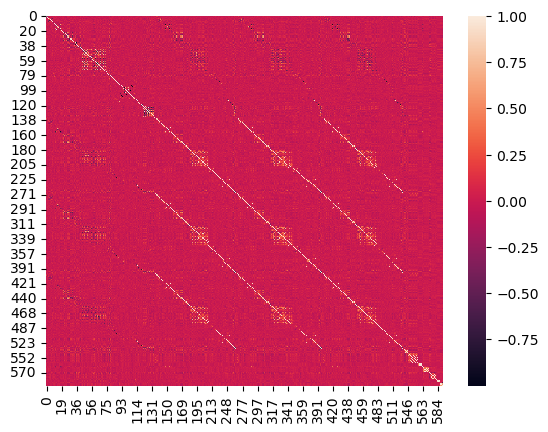

In [37]:
sns.heatmap(corr_matrix)
#no point doing this since we can barely make anything out of the heatmap or
#the matrix above

In [38]:
#we will create uppeer triangle matrix of correlation matrix because if we apply
#drop columns for highly correlated cols, it will drop both columns that are
#correlated due to the correlation occuring twice.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
upper

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,NaN,-0.174254,-0.004933,0.000871,-0.003782,-0.015269,0.002752,-0.066828,0.024701,-0.008397,...,0.034483,-0.023146,0.019573,-0.020495,-0.023895,-0.020311,0.013071,-0.009036,-0.012880,-0.022351
1,NaN,NaN,0.011939,-0.024861,0.026839,-0.004108,0.014045,0.034055,0.025961,0.022249,...,0.004398,-0.031562,0.034954,0.031354,0.010121,0.030342,-0.011229,0.019134,0.005577,0.013544
2,NaN,NaN,NaN,0.429100,0.103320,-0.180483,-0.441057,0.033068,0.009325,0.053804,...,0.017690,-0.078017,-0.011130,-0.004858,0.006688,-0.005072,-0.047422,-0.038042,-0.042075,-0.010301
3,NaN,NaN,NaN,NaN,0.227607,-0.598326,0.160051,-0.039619,0.065955,0.042285,...,0.062947,0.001305,-0.003874,-0.024560,-0.031548,-0.024818,0.016755,-0.046960,-0.045129,-0.061878
4,NaN,NaN,NaN,NaN,NaN,-0.165679,0.119434,0.018712,0.008362,-0.009422,...,0.064258,0.055979,0.042790,0.007499,-0.001365,0.006475,0.012536,0.014989,0.019185,0.017437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.019582,0.012017,0.020354,0.039165
586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051010,0.035499,-0.579792
587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975170,0.591619
588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593667


<Axes: >

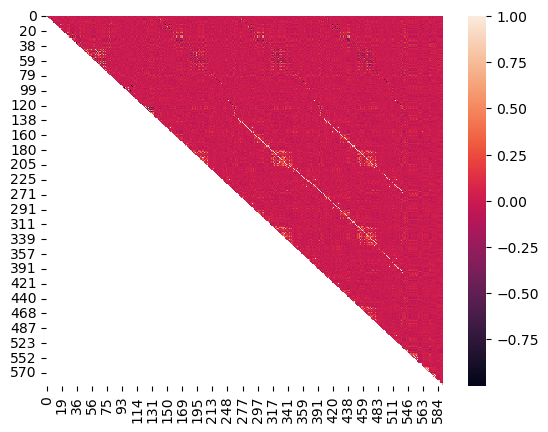

In [39]:
sns.heatmap(upper)

In [40]:
neg_corr = [column for column in upper.columns if any(upper[column] <= -0.9)]
pos_corr = [column for column in upper.columns if any(upper[column] >= 0.9)]

In [41]:
print('Negative correlation \n', neg_corr)
print('Positive correlation \n', pos_corr)

Negative correlation 
 ['36', '96', '104', '105', '106', '147', '153', '282', '288', '420', '426']
Positive correlation 
 ['18', '60', '65', '70', '101', '123', '127', '154', '174', '201', '249', '270', '271', '272', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '337', '338', '339', '340', '341', '342', '343', '344', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '359', '360', '361', '362', '363', '365', '366', '376', '377', '385', '386', '387', '388', '389', '390', '391', '392', '393', '405', '406', '407', '408', '409', '410', '411', '413', '415', '416', '417', '420', '421', '424', '425', '426', '427', '428', '429', '430', '431', '434', '435', '436', '437', '438', '440', '441',

In [42]:
total_corr = neg_corr + pos_corr
print(total_corr)

['36', '96', '104', '105', '106', '147', '153', '282', '288', '420', '426', '18', '60', '65', '70', '101', '123', '127', '154', '174', '201', '249', '270', '271', '272', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '337', '338', '339', '340', '341', '342', '343', '344', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '359', '360', '361', '362', '363', '365', '366', '376', '377', '385', '386', '387', '388', '389', '390', '391', '392', '393', '405', '406', '407', '408', '409', '410', '411', '413', '415', '416', '417', '420', '421', '424', '425', '426', '427', '428', '429', '430', '431', '434', '435', '436', '437', '438', '440', '441', '442', '443', '444', '445', '446', '447', '448

In [43]:
print('Number of columns with correlation coefficient greater than 0.9: ', len(total_corr))

Number of columns with correlation coefficient greater than 0.9:  196


In [44]:
X_scaled.drop(columns = total_corr, axis = 1, inplace = True)
X_scaled.shape

(1577, 256)

In [45]:
# After applying unique value columns and multi collinearity we have 
#256 columns left

In [46]:
#feature reduction part 4: using VIF (Variance Inflation Factor)
#VIF approach

In [47]:
#what is the difference between VIF and Multicollinearity?
#In Multicollinearity we see the correlation between two columns and drop one of 
#them if it's high. In VIF, the acceptable range is less than 10. If value is 
#higher than 10, it means that the column has multicollinearity with any one 
#column, we don't know which but we can simply drop that column.

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
import statsmodels.api as sm
X1 = sm.add_constant(X_scaled) #means adding a column

In [50]:
#if we don't add a constant column that is the intercept value then it will get 
#added to all the other features which would give us high VIF values.
vif1 = pd.DataFrame()
vif1['variables'] = X1.columns
vif1['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1

,variables,VIF
0,const,1.301216e+06
1,0,1.334191e+00
2,1,1.270338e+00
3,2,1.684335e+00
4,3,8.230649e+00
...,...,...
252,583,6.131688e+01
253,584,6.150012e+01
254,586,2.065324e+00
255,587,1.899356e+00


In [51]:
#we can find the High VIF columns by keeping a bench mark of VIF = 10
high_vif = vif1[vif1['VIF'] > 10]
high_vif.shape

(71, 2)

In [52]:
high_vif.index

Index([  0,   5,  13,  15,  23,  24,  25,  28,  29,  32,  39,  41,  42,  43,
        44,  45,  46,  47,  48,  50,  51,  54,  55,  56,  57,  58,  59,  60,
        62,  63,  82,  84,  96, 100, 102, 115, 116, 117, 123, 124, 126, 134,
       135, 151, 153, 154, 156, 157, 159, 160, 161, 162, 163, 164, 165, 167,
       191, 198, 200, 201, 202, 205, 208, 212, 213, 216, 217, 218, 237, 252,
       253],
      dtype='int64')

In [53]:
#what happens if we don't add constant
vif2 = pd.DataFrame()
vif2['variables'] = X_scaled.columns
vif2['VIF'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif2

,variables,VIF
0,0,19.383813
1,1,23.768097
2,2,40.048508
3,3,91.138917
4,4,29612.562845
...,...,...
251,583,92.856729
252,584,98.001467
253,586,22.021268
254,587,6.178555


In [54]:
high_vif2 = vif2[vif2['VIF'] > 10]
high_vif2.shape
#we are getting 184 columns because of not adding constant.

(184, 2)

In [55]:
X1 = X1.drop(columns = high_vif['variables'], axis = 1)
X1.shape

(1577, 186)

In [56]:
#Recursive_feature_elimination
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state = 105)

In [57]:
sfm = SelectFromModel(rf)
sfm.fit(X1,Y)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=105))

In [58]:
print('Bench mark value of feature importance: ', np.mean(sfm.estimator_.feature_importances_))

Bench mark value of feature importance:  0.005376344086021506


In [59]:
sfm.get_support()

array([ True, False,  True, False, False,  True, False, False,  True,
        True, False, False,  True, False, False,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True,  True, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
        True,  True, False, False, False,  True,  True,  True, False,
       False,  True,

In [60]:
feature_selected_sfm = X1.columns[sfm.get_support()]
feature_selected_sfm

Index(['0', '2', '7', '10', '11', '17', '21', '22', '23', '24', '32', '33',
       '38', '40', '59', '71', '75', '77', '78', '81', '82', '83', '88', '89',
       '93', '99', '102', '103', '107', '113', '119', '120', '132', '133',
       '135', '144', '156', '159', '160', '163', '166', '168', '169', '170',
       '208', '210', '211', '212', '214', '215', '216', '221', '222', '223',
       '227', '238', '239', '247', '248', '267', '269', '316', '433', '472',
       '500', '510', '550', '551', '559', '562', '565', '571', '572', '573',
       '582', '587', '589'],
      dtype='object')

In [61]:
len(feature_selected_sfm)

77

In [62]:
X1_final = X1[feature_selected_sfm]
X1_final.head()

,0,2,7,10,11,17,21,22,23,24,...,551,559,562,565,571,572,573,582,587,589
0,0.376148,0.534140,0.906716,0.393629,0.910747,0.968426,0.110171,0.834530,0.507561,0.563973,...,0.055621,0.260211,0.332909,0.047840,0.746490,0.007249,0.024460,0.771875,0.110821,0.079433
1,0.504934,0.493336,0.907463,0.296928,0.924712,0.973360,0.120276,0.829470,0.487034,0.563878,...,0.028008,0.506575,0.284586,0.104079,0.727392,0.009428,0.099531,0.703125,0.348110,0.178019
2,0.279281,0.475051,0.909701,0.348123,0.898907,0.972866,0.246285,0.723761,0.458977,0.413535,...,0.035108,0.344889,0.309297,0.159418,0.691355,0.004781,0.127324,0.503125,0.348110,0.178019
3,0.353313,0.578696,0.924627,0.417520,0.939587,0.984953,0.085521,0.816137,0.731513,0.561786,...,0.061538,0.092847,0.040163,0.341332,0.804979,0.012474,0.132864,0.671875,0.192960,0.173988
4,0.361322,0.474658,0.907463,0.440273,0.933819,0.975333,0.111989,0.811419,0.449280,0.566619,...,0.052071,0.506575,0.287190,0.070036,0.696015,0.002824,0.113944,0.643750,0.192960,0.173988


# model building 

In [64]:
#Y = df1['Pass/Fail']  --> Dependent variable
#X1_final  --> Independent variables

In [65]:
df1['Pass/Fail'].value_counts()

Pass/Fail
0    1472
1     105
Name: count, dtype: int64

In [66]:
#not a rule but just a way to check if your data is imbalanced: 
#if 3*minority_class_count < majority_class_count -->imbalanced.

In [67]:
df1['Pass/Fail'].value_counts(normalize = True)

Pass/Fail
0    0.933418
1    0.066582
Name: proportion, dtype: float64

## there are some approaches for balancing an imbalanced dataset: (Let's say we have a dataset of 1000: 0-900, 1-100)
1) Under Sampling: will take 0:100,1:100 to train model efficiently for both classes
2) Over Sampling: will take 0:900,1:900 to train model by duplicating the minority class values
3) Smote technique: will take 0:900,1:900 similar to over sampling but it will create the extra minority class values using k-NN approach. It will not create duplicates but instead creates similar observations using euclidean distance and finding neighbour data.

In [69]:
#splitting into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1_final,Y, test_size = 0.2,
                                        random_state = 101, stratify = Y, )
#random_state fixes the training set so that everytime you run the code, 
#data splitting is done anew and our accuracy could change a little every time

#when model is imbalanced we use stratify, that is stratified sampling --> this
#helps in making sure that the minority class doesn't get neglected in 
#selecting training data or as to prevent uncertainty in selection. Using stratify,
#it will split our data into two strata of say, 90% and 10% and then do the 
#selection based on that data taking 90% of majority class and 10% of minority 
#class for our training set as it is present like that in our population.

#we pass the dependent variable to stratify

In [70]:
# without balancing, let's create the model

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [72]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
bg = BaggingClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nv= GaussianNB()

In [73]:
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

In [74]:
#create a generalized function to use for all ml models
for model in [dt, rf, bg, svc, nv]:
    print('======='*6)
    print('Performance of the ', model)
    print('======='*6)
    abc = model.fit(X_train, Y_train)
    y_pred = abc.predict(X_test)
    con_mat = confusion_matrix(Y_test, y_pred)
    acc_score = accuracy_score(Y_test, y_pred)
    cl_report = classification_report(Y_test, y_pred)
    pr = precision_recall_fscore_support(Y_test, y_pred)
    roc = roc_auc_score(Y_test, y_pred)
    
    #printing the above evaluations
    print('Confusion Matrix \n', con_mat)
    print('==========')
    print('Accuracy score \n', acc_score)
    print('==========')
    print('Classification Report \n', cl_report)
    print('==========')
    print('Precision Recall F1 score \n', pr)
    print('==========')
    print('ROC value \n', roc)
    

Performance of the  DecisionTreeClassifier()
Confusion Matrix 
 [[271  24]
 [ 18   3]]
Accuracy score 
 0.8670886075949367
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       295
           1       0.11      0.14      0.12        21

    accuracy                           0.87       316
   macro avg       0.52      0.53      0.53       316
weighted avg       0.88      0.87      0.87       316

Precision Recall F1 score 
 (array([0.93771626, 0.11111111]), array([0.91864407, 0.14285714]), array([0.92808219, 0.125     ]), array([295,  21], dtype=int64))
ROC value 
 0.5307506053268765
Performance of the  RandomForestClassifier()
Confusion Matrix 
 [[295   0]
 [ 20   1]]
Accuracy score 
 0.9367088607594937
Classification Report 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       295
           1       1.00      0.05      0.09        21

    accuracy            

In [75]:
#don't know why it wasn't working above
knn_model = knn.fit(X_train, Y_train)
y_pred = knn_model.predict(X_test) 

#printing the above evaluations
print('Confusion Matrix \n', confusion_matrix(Y_test, y_pred))
print('==========')
print('Accuracy score \n', accuracy_score(Y_test, y_pred))
print('==========')
print('Classification Report \n', classification_report(Y_test, y_pred))
print('==========')
print('Precision Recall F1 score \n', precision_recall_fscore_support(Y_test, y_pred))

Confusion Matrix 
 [[295   0]
 [ 21   0]]
Accuracy score 
 0.9335443037974683
Classification Report 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       295
           1       0.00      0.00      0.00        21

    accuracy                           0.93       316
   macro avg       0.47      0.50      0.48       316
weighted avg       0.87      0.93      0.90       316

Precision Recall F1 score 
 (array([0.9335443, 0.       ]), array([1., 0.]), array([0.96563011, 0.        ]), array([295,  21], dtype=int64))


### Without balancing the datasets, when we do a model fitting on it, the recall value for '1' is very less for all of them. Naive Bayes gives a recall of 0.33 so we can try to work with that.

### Let's try to find if we can do it without balancing the dataset

In [76]:
#GaussianNB inside BaggingClassifier
bgnv = BaggingClassifier(GaussianNB(), bootstrap = True, random_state = 7)

In [77]:
bgnv_model = bgnv.fit(X_train, Y_train)
y_pred = bgnv_model.predict(X_test) 

#printing the above evaluations
print('Confusion Matrix \n', confusion_matrix(Y_test, y_pred))
print('==========')
print('Accuracy score \n', accuracy_score(Y_test, y_pred))
print('==========')
print('Classification Report \n', classification_report(Y_test, y_pred))
print('==========')
print('Precision Recall F1 score \n', precision_recall_fscore_support(Y_test, y_pred))
#recall is very less 

Confusion Matrix 
 [[265  30]
 [ 16   5]]
Accuracy score 
 0.8544303797468354
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       295
           1       0.14      0.24      0.18        21

    accuracy                           0.85       316
   macro avg       0.54      0.57      0.55       316
weighted avg       0.89      0.85      0.87       316

Precision Recall F1 score 
 (array([0.9430605 , 0.14285714]), array([0.89830508, 0.23809524]), array([0.92013889, 0.17857143]), array([295,  21], dtype=int64))


In [91]:
#Balancing the data
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE
#for under samplaing
from imblearn.under_sampling import RandomUnderSampler

In [86]:
sm = SMOTE()
ros = RandomOverSampler()
bls = BorderlineSMOTE()

In [94]:
rus = RandomUnderSampler()
X_train_rus, Y_train_rus = rus.fit_resample(X_train, Y_train)

In [87]:
X_train_smote, Y_train_smote = sm.fit_resample(X_train, Y_train)
X_train_ros, Y_train_ros = ros.fit_resample(X_train, Y_train)
X_train_bls, Y_train_bls = bls.fit_resample(X_train, Y_train)

In [84]:
Y_train.value_counts()

Pass/Fail
0    1177
1      84
Name: count, dtype: int64

In [85]:
Y_train_smote.value_counts()

Pass/Fail
0    1177
1    1177
Name: count, dtype: int64

In [88]:
Y_train_ros.value_counts() 

Pass/Fail
0    1177
1    1177
Name: count, dtype: int64

In [89]:
Y_train_bls.value_counts()
#they all do the same thing

Pass/Fail
0    1177
1    1177
Name: count, dtype: int64

In [95]:
Y_train_rus.value_counts() 

Pass/Fail
0    84
1    84
Name: count, dtype: int64

In [98]:
for model in [dt, rf, bgnv, nv, bg]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls, rus]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')

AFTER BALANCING, Performance of the  DecisionTreeClassifier()
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[256  39]
 [ 17   4]]
Accuracy score 
 0.8227848101265823
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       295
           1       0.09      0.19      0.12        21

    accuracy                           0.82       316
   macro avg       0.52      0.53      0.51       316
weighted avg       0.88      0.82      0.85       316

Precision Recall F1 score 
 (array([0.93772894, 0.09302326]), array([0.86779661, 0.19047619]), array([0.90140845, 0.125     ]), array([295,  21], dtype=int64))
ROC value 
 0.5291364003228409
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[273  22]
 [ 19   2]]
Accuracy score 
 0.870253164556962
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       295
    

Confusion Matrix 
 [[189 106]
 [ 11  10]]
Accuracy score 
 0.629746835443038
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.64      0.76       295
           1       0.09      0.48      0.15        21

    accuracy                           0.63       316
   macro avg       0.52      0.56      0.45       316
weighted avg       0.89      0.63      0.72       316

Precision Recall F1 score 
 (array([0.945    , 0.0862069]), array([0.64067797, 0.47619048]), array([0.76363636, 0.1459854 ]), array([295,  21], dtype=int64))
ROC value 
 0.5584342211460855
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[244  51]
 [ 12   9]]
Accuracy score 
 0.8006329113924051
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.83      0.89       295
           1       0.15      0.43      0.22        21

    accuracy                           0.80       316
   ma

## Best: BaggingClassifier(GaussianNB), BorderlineSMOTE
- recall: 0.86, 0.43

In [107]:
import lightgbm as lgb
lg = lgb.LGBMClassifier()

In [108]:
for model in [lg]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')

AFTER BALANCING, Performance of the  LGBMClassifier()
The sampling method for balancing is  SMOTE()
[LightGBM] [Info] Number of positive: 1177, number of negative: 1177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19619
[LightGBM] [Info] Number of data points in the train set: 2354, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix 
 [[281  14]
 [ 17   4]]
Accuracy score 
 0.9018987341772152
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       295
           1       0.22      0.19      0.21        21

    accuracy                           0.90       316
   macro avg       0.58      0.57      0.58       316
weighted avg       0.90  

In [125]:
#new technique/algorithm
from imblearn.ensemble import EasyEnsembleClassifier

In [128]:
eec = EasyEnsembleClassifier(random_state = 100, n_estimators = 80, sampling_strategy = {1:85, 0:80}, estimator = AdaBoostClassifier(DecisionTreeClassifier()))

In [129]:
#AdaBoostClassifier(DecisionTreeClassifier()
for model in [eec]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')

AFTER BALANCING, Performance of the  EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
                       n_estimators=80, random_state=100,
                       sampling_strategy={0: 80, 1: 85})
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[242  53]
 [  8  13]]
Accuracy score 
 0.8069620253164557
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.82      0.89       295
           1       0.20      0.62      0.30        21

    accuracy                           0.81       316
   macro avg       0.58      0.72      0.59       316
weighted avg       0.92      0.81      0.85       316

Precision Recall F1 score 
 (array([0.968    , 0.1969697]), array([0.82033898, 0.61904762]), array([0.88807339, 0.29885057]), array([295,  21], dtype=int64))
ROC value 
 0.7196933010492331
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[244  51]
 [  9  

## ABOVE MODEL GIVES GREAT RESULTS COMPARED TO OTHERS.
## Best: EasyEnsembleClassifier(estimator=AdaBoostClassifier (estimator=DecisionTreeClassifier()) , SMOTE
- recall- 0:0.82, 1:0.62

In [131]:
eec2 = EasyEnsembleClassifier(random_state = 100, n_estimators = 80, sampling_strategy = {1:80, 0:80}, estimator = AdaBoostClassifier(DecisionTreeClassifier()))

In [132]:
#AdaBoostClassifier(DecisionTreeClassifier()
#LET'S SEE THE MODEL WITHOUT BALANCING
for model in [eec2]:
    print('======='*6)
    print('Performance of the ', model)
    print('======='*6)
    abc = model.fit(X_train, Y_train)
    y_pred = abc.predict(X_test)
    con_mat = confusion_matrix(Y_test, y_pred)
    acc_score = accuracy_score(Y_test, y_pred)
    cl_report = classification_report(Y_test, y_pred)
    pr = precision_recall_fscore_support(Y_test, y_pred)
    roc = roc_auc_score(Y_test, y_pred)
    
    #printing the above evaluations
    print('Confusion Matrix \n', con_mat)
    print('==========')
    print('Accuracy score \n', acc_score)
    print('==========')
    print('Classification Report \n', cl_report)
    print('==========')
    print('Precision Recall F1 score \n', pr)
    print('==========')
    print('ROC value \n', roc)

Performance of the  EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
                       n_estimators=80, random_state=100,
                       sampling_strategy={0: 80, 1: 80})
Confusion Matrix 
 [[221  74]
 [  8  13]]
Accuracy score 
 0.740506329113924
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.75      0.84       295
           1       0.15      0.62      0.24        21

    accuracy                           0.74       316
   macro avg       0.56      0.68      0.54       316
weighted avg       0.91      0.74      0.80       316

Precision Recall F1 score 
 (array([0.9650655 , 0.14942529]), array([0.74915254, 0.61904762]), array([0.84351145, 0.24074074]), array([295,  21], dtype=int64))
ROC value 
 0.6841000807102502


In [135]:
eec3 = EasyEnsembleClassifier(random_state = 100, n_estimators = 80, sampling_strategy = {1:85, 0:80}, estimator = AdaBoostClassifier(nv))

In [136]:
#AdaBoostClassifier(nv)
for model in [eec3]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')

AFTER BALANCING, Performance of the  EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=GaussianNB()),
                       n_estimators=80, random_state=100,
                       sampling_strategy={0: 80, 1: 85})
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[263  32]
 [ 15   6]]
Accuracy score 
 0.8512658227848101
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       295
           1       0.16      0.29      0.20        21

    accuracy                           0.85       316
   macro avg       0.55      0.59      0.56       316
weighted avg       0.89      0.85      0.87       316

Precision Recall F1 score 
 (array([0.94604317, 0.15789474]), array([0.89152542, 0.28571429]), array([0.91797557, 0.20338983]), array([295,  21], dtype=int64))
ROC value 
 0.5886198547215495
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[210  85]
 [ 10  11]]
Accur

In [138]:
eec4 = EasyEnsembleClassifier(random_state = 100, n_estimators = 80, sampling_strategy = {1:85, 0:80}, estimator = BaggingClassifier(nv))

In [139]:
#BaggingClassifier(nv)
for model in [eec4]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')

AFTER BALANCING, Performance of the  EasyEnsembleClassifier(estimator=BaggingClassifier(estimator=GaussianNB()),
                       n_estimators=80, random_state=100,
                       sampling_strategy={0: 80, 1: 85})
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[236  59]
 [ 14   7]]
Accuracy score 
 0.7689873417721519
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.80      0.87       295
           1       0.11      0.33      0.16        21

    accuracy                           0.77       316
   macro avg       0.53      0.57      0.51       316
weighted avg       0.89      0.77      0.82       316

Precision Recall F1 score 
 (array([0.944     , 0.10606061]), array([0.8       , 0.33333333]), array([0.86605505, 0.16091954]), array([295,  21], dtype=int64))
ROC value 
 0.5666666666666667
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[226  69]
 [ 12   9]]
Accura

In [190]:
eec5 = EasyEnsembleClassifier(random_state = 100, n_estimators = 80, sampling_strategy = {1:85, 0:80}, estimator = AdaBoostClassifier(RandomForestClassifier()))

In [191]:
#AdaBoostClassifier(RandomForestClassifier)
for model in [eec5]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')

AFTER BALANCING, Performance of the  EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=RandomForestClassifier()),
                       n_estimators=80, random_state=100,
                       sampling_strategy={0: 80, 1: 85})
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[237  58]
 [ 11  10]]
Accuracy score 
 0.7816455696202531
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.80      0.87       295
           1       0.15      0.48      0.22        21

    accuracy                           0.78       316
   macro avg       0.55      0.64      0.55       316
weighted avg       0.90      0.78      0.83       316

Precision Recall F1 score 
 (array([0.95564516, 0.14705882]), array([0.80338983, 0.47619048]), array([0.87292818, 0.2247191 ]), array([295,  21], dtype=int64))
ROC value 
 0.6397901533494754
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[240  55]
 [  8

## Another good model:  EasyEnsembleClassifier(estimator=AdaBoostClassifier (estimator=RandomForestClassifier())) , RandomOverSampler
- recall: 0-0.80 , 1-0.62 

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier()

In [110]:
for model in [gbclf]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')

AFTER BALANCING, Performance of the  GradientBoostingClassifier()
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[265  30]
 [ 14   7]]
Accuracy score 
 0.8607594936708861
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       295
           1       0.19      0.33      0.24        21

    accuracy                           0.86       316
   macro avg       0.57      0.62      0.58       316
weighted avg       0.90      0.86      0.88       316

Precision Recall F1 score 
 (array([0.94982079, 0.18918919]), array([0.89830508, 0.33333333]), array([0.92334495, 0.24137931]), array([295,  21], dtype=int64))
ROC value 
 0.615819209039548
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[277  18]
 [ 16   5]]
Accuracy score 
 0.8924050632911392
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       295


In [111]:
from sklearn.ensemble import AdaBoostClassifier
ad_clf = AdaBoostClassifier()

In [112]:
for model in [ad_clf]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')

AFTER BALANCING, Performance of the  AdaBoostClassifier()
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[250  45]
 [ 16   5]]
Accuracy score 
 0.8069620253164557
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       295
           1       0.10      0.24      0.14        21

    accuracy                           0.81       316
   macro avg       0.52      0.54      0.52       316
weighted avg       0.88      0.81      0.84       316

Precision Recall F1 score 
 (array([0.93984962, 0.1       ]), array([0.84745763, 0.23809524]), array([0.8912656 , 0.14084507]), array([295,  21], dtype=int64))
ROC value 
 0.5427764326069411
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[255  40]
 [ 14   7]]
Accuracy score 
 0.8291139240506329
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       295
       

In [113]:
adclf = AdaBoostClassifier(dt)

In [114]:
for model in [adclf]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')

AFTER BALANCING, Performance of the  AdaBoostClassifier(estimator=DecisionTreeClassifier())
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[255  40]
 [ 18   3]]
Accuracy score 
 0.8164556962025317
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.86      0.90       295
           1       0.07      0.14      0.09        21

    accuracy                           0.82       316
   macro avg       0.50      0.50      0.50       316
weighted avg       0.88      0.82      0.84       316

Precision Recall F1 score 
 (array([0.93406593, 0.06976744]), array([0.86440678, 0.14285714]), array([0.89788732, 0.09375   ]), array([295,  21], dtype=int64))
ROC value 
 0.5036319612590799
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[281  14]
 [ 18   3]]
Accuracy score 
 0.8987341772151899
Classification Report 
               precision    recall  f1-score   support

           0       0.94    

In [115]:
adnv_clf = AdaBoostClassifier(nv)

In [116]:
for model in [adnv_clf]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')

AFTER BALANCING, Performance of the  AdaBoostClassifier(estimator=GaussianNB())
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[284  11]
 [ 17   4]]
Accuracy score 
 0.9113924050632911
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       295
           1       0.27      0.19      0.22        21

    accuracy                           0.91       316
   macro avg       0.61      0.58      0.59       316
weighted avg       0.90      0.91      0.90       316

Precision Recall F1 score 
 (array([0.94352159, 0.26666667]), array([0.96271186, 0.19047619]), array([0.95302013, 0.22222222]), array([295,  21], dtype=int64))
ROC value 
 0.576594027441485
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[158 137]
 [  5  16]]
Accuracy score 
 0.5506329113924051
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.54      0

In [117]:
#without balancing
for model in [lg, gbclf, ad_clf, adclf, adnv_clf]:
    print('======='*6)
    print('Performance of the ', model)
    print('======='*6)
    abc = model.fit(X_train, Y_train)
    y_pred = abc.predict(X_test)
    con_mat = confusion_matrix(Y_test, y_pred)
    acc_score = accuracy_score(Y_test, y_pred)
    cl_report = classification_report(Y_test, y_pred)
    pr = precision_recall_fscore_support(Y_test, y_pred)
    roc = roc_auc_score(Y_test, y_pred)
    
    #printing the above evaluations
    print('Confusion Matrix \n', con_mat)
    print('==========')
    print('Accuracy score \n', acc_score)
    print('==========')
    print('Classification Report \n', cl_report)
    print('==========')
    print('Precision Recall F1 score \n', pr)
    print('==========')
    print('ROC value \n', roc)

Performance of the  LGBMClassifier()
[LightGBM] [Info] Number of positive: 84, number of negative: 1177
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17580
[LightGBM] [Info] Number of data points in the train set: 1261, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066614 -> initscore=-2.639907
[LightGBM] [Info] Start training from score -2.639907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Confusion Matrix 
 [[293   2]
 [ 20   1]]
Accuracy score 
 0.930379746835443
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       295
           1       0.33      0.05      0.08        21

    accuracy                           0.93       316
   macro avg       0.63      0.52      0.52       316
weighted avg       0.90  

In [ ]:
#nothing seems to give us a good recall for minority class
#f1-score macro avg should be around 0.6-0.7 at least. recall should be at 
#least 0.5-0.6 for minority class without disturbing the recall of majority 
#class by much

## Optimization of model
### last option is hyper parameter tuning using GridSearchCV, RandomizedSearchCV

In [118]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [119]:
rf.get_params()   #it returns the default parameters of random forest

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [120]:
bg.get_params()  #it returns the default parameters of bagging

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [124]:
#bagging optimization
param_dict_bg = {'max_samples': [1, 5, 10], 'n_estimators': np.arange(10,200,10)}
grid_cv = GridSearchCV(bg, param_dict_bg, verbose=3)
grid_cv.fit(X_train,Y_train)
print('GridSearchCV best parameters: ', grid_cv.best_params_)
#all this printing is due to verbose

Fitting 5 folds for each of 57 candidates, totalling 285 fits
[CV 1/5] END ....max_samples=1, n_estimators=10;, score=0.933 total time=   0.0s
[CV 2/5] END ....max_samples=1, n_estimators=10;, score=0.937 total time=   0.0s
[CV 3/5] END ....max_samples=1, n_estimators=10;, score=0.933 total time=   0.0s
[CV 4/5] END ....max_samples=1, n_estimators=10;, score=0.933 total time=   0.0s
[CV 5/5] END ....max_samples=1, n_estimators=10;, score=0.933 total time=   0.0s
[CV 1/5] END ....max_samples=1, n_estimators=20;, score=0.933 total time=   0.1s
[CV 2/5] END ....max_samples=1, n_estimators=20;, score=0.937 total time=   0.1s
[CV 3/5] END ....max_samples=1, n_estimators=20;, score=0.933 total time=   0.0s
[CV 4/5] END ....max_samples=1, n_estimators=20;, score=0.933 total time=   0.0s
[CV 5/5] END ....max_samples=1, n_estimators=20;, score=0.933 total time=   0.1s
[CV 1/5] END ....max_samples=1, n_estimators=30;, score=0.933 total time=   0.2s
[CV 2/5] END ....max_samples=1, n_estimators=30

[CV 3/5] END ....max_samples=5, n_estimators=20;, score=0.933 total time=   0.1s
[CV 4/5] END ....max_samples=5, n_estimators=20;, score=0.933 total time=   0.1s
[CV 5/5] END ....max_samples=5, n_estimators=20;, score=0.933 total time=   0.1s
[CV 1/5] END ....max_samples=5, n_estimators=30;, score=0.933 total time=   0.2s
[CV 2/5] END ....max_samples=5, n_estimators=30;, score=0.937 total time=   0.2s
[CV 3/5] END ....max_samples=5, n_estimators=30;, score=0.933 total time=   0.2s
[CV 4/5] END ....max_samples=5, n_estimators=30;, score=0.933 total time=   0.2s
[CV 5/5] END ....max_samples=5, n_estimators=30;, score=0.933 total time=   0.2s
[CV 1/5] END ....max_samples=5, n_estimators=40;, score=0.933 total time=   0.2s
[CV 2/5] END ....max_samples=5, n_estimators=40;, score=0.937 total time=   0.2s
[CV 3/5] END ....max_samples=5, n_estimators=40;, score=0.933 total time=   0.2s
[CV 4/5] END ....max_samples=5, n_estimators=40;, score=0.933 total time=   0.2s
[CV 5/5] END ....max_samples

[CV 1/5] END ...max_samples=10, n_estimators=40;, score=0.933 total time=   0.2s
[CV 2/5] END ...max_samples=10, n_estimators=40;, score=0.937 total time=   0.2s
[CV 3/5] END ...max_samples=10, n_estimators=40;, score=0.933 total time=   0.2s
[CV 4/5] END ...max_samples=10, n_estimators=40;, score=0.933 total time=   0.2s
[CV 5/5] END ...max_samples=10, n_estimators=40;, score=0.933 total time=   0.2s
[CV 1/5] END ...max_samples=10, n_estimators=50;, score=0.933 total time=   0.2s
[CV 2/5] END ...max_samples=10, n_estimators=50;, score=0.937 total time=   0.2s
[CV 3/5] END ...max_samples=10, n_estimators=50;, score=0.933 total time=   0.2s
[CV 4/5] END ...max_samples=10, n_estimators=50;, score=0.933 total time=   0.2s
[CV 5/5] END ...max_samples=10, n_estimators=50;, score=0.933 total time=   0.2s
[CV 1/5] END ...max_samples=10, n_estimators=60;, score=0.933 total time=   0.3s
[CV 2/5] END ...max_samples=10, n_estimators=60;, score=0.937 total time=   0.3s
[CV 3/5] END ...max_samples=

In [123]:
#RandomForest optimization
param_dict_rf = {'n_estimators': np.arange(10,160,10),
                'max_depth': np.arange(10,110,10),
                'min_samples_split': [2,5,10]}

random_cv = RandomizedSearchCV(rf, param_dict_rf, verbose=3)
random_cv.fit(X_train,Y_train)
print('RandomizedSearchCV best parameters: ', random_cv.best_params_)
#all this printing is due to verbose

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=100, min_samples_split=5, n_estimators=60;, score=0.933 total time=   1.4s
[CV 2/5] END max_depth=100, min_samples_split=5, n_estimators=60;, score=0.937 total time=   1.3s
[CV 3/5] END max_depth=100, min_samples_split=5, n_estimators=60;, score=0.940 total time=   1.3s
[CV 4/5] END max_depth=100, min_samples_split=5, n_estimators=60;, score=0.937 total time=   1.6s
[CV 5/5] END max_depth=100, min_samples_split=5, n_estimators=60;, score=0.933 total time=   1.9s
[CV 1/5] END max_depth=40, min_samples_split=10, n_estimators=20;, score=0.933 total time=   0.6s
[CV 2/5] END max_depth=40, min_samples_split=10, n_estimators=20;, score=0.937 total time=   0.5s
[CV 3/5] END max_depth=40, min_samples_split=10, n_estimators=20;, score=0.940 total time=   0.5s
[CV 4/5] END max_depth=40, min_samples_split=10, n_estimators=20;, score=0.933 total time=   0.5s
[CV 5/5] END max_depth=40, min_samples_split=10, n_estima

In [144]:
rf.set_params(n_estimators= 70, min_samples_split= 5, max_depth= 90)

RandomForestClassifier(max_depth=90, min_samples_split=5, n_estimators=70)

In [145]:
for model in [rf]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')

AFTER BALANCING, Performance of the  RandomForestClassifier(max_depth=90, min_samples_split=5, n_estimators=70)
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[291   4]
 [ 18   3]]
Accuracy score 
 0.930379746835443
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       295
           1       0.43      0.14      0.21        21

    accuracy                           0.93       316
   macro avg       0.69      0.56      0.59       316
weighted avg       0.91      0.93      0.91       316

Precision Recall F1 score 
 (array([0.94174757, 0.42857143]), array([0.98644068, 0.14285714]), array([0.96357616, 0.21428571]), array([295,  21], dtype=int64))
ROC value 
 0.5646489104116222
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[295   0]
 [ 20   1]]
Accuracy score 
 0.9367088607594937
Classification Report 
               precision    recall  f1-score   support

        

# We have three great models above
### BaggingClassifier(GaussianNB), BorderlineSMOTE
- recall: 0.86, 0.43
### EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=RandomForestClassifier())) , RandomOverSampler
- recall: 0: 0.80 , 1: 0.62 
### EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()) , SMOTE
- recall- 0:0.82, 1:0.62

In [154]:
eec6 = EasyEnsembleClassifier(random_state = 100, n_estimators = 80, sampling_strategy = {1:85, 0:80}, estimator = AdaBoostClassifier(RandomForestClassifier(n_estimators= 70, min_samples_split= 5, max_depth= 90)))

In [155]:
#AdaBoostClassifier(RandomForestClassifier(parameters_tuned))
for model in [eec6]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')

AFTER BALANCING, Performance of the  EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=90,
                                                                                     min_samples_split=5,
                                                                                     n_estimators=70)),
                       n_estimators=80, random_state=100,
                       sampling_strategy={0: 80, 1: 85})
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[238  57]
 [ 11  10]]
Accuracy score 
 0.7848101265822784
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.81      0.88       295
           1       0.15      0.48      0.23        21

    accuracy                           0.78       316
   macro avg       0.55      0.64      0.55       316
weighted avg       0.90      0.78      0.83       316

Precision Recall F1 score 
 (array([0.95582329, 0.14925373]), ar

In [156]:
ad_clf = AdaBoostClassifier()
ad_clf.get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [158]:
#adaboost optimization WITHOUT randomforest
X_train1, Y_train1 = ros.fit_resample(X_train, Y_train)
param_dict_adb = {'n_estimators': np.arange(10,200,10)}
ram_cv = RandomizedSearchCV(ad_clf, param_dict_adb)
ram_cv.fit(X_train1 ,Y_train1)
print('GridSearchCV best parameters: ', ram_cv.best_params_)

GridSearchCV best parameters:  {'n_estimators': 170}


In [160]:
#adaboost optimization WITH randomforest(WITHOUT hyper parameters tuned)
rf2 = RandomForestClassifier()
adarf2 = AdaBoostClassifier(rf2)
X_train1, Y_train1 = ros.fit_resample(X_train, Y_train)
param_dict_adb = {'n_estimators': np.arange(10,200,10)}
ram_cv = RandomizedSearchCV(adarf2, param_dict_adb)
ram_cv.fit(X_train1 ,Y_train1)
print('GridSearchCV best parameters: ', ram_cv.best_params_)

GridSearchCV best parameters:  {'n_estimators': 60}


In [159]:
#adaboost optimization WITH randomforest(With hyper parameters tuned)
adarf = AdaBoostClassifier(rf)
X_train1, Y_train1 = ros.fit_resample(X_train, Y_train)
param_dict_adb = {'n_estimators': np.arange(10,200,10)}
ram_cv = RandomizedSearchCV(adarf, param_dict_adb)
ram_cv.fit(X_train1 ,Y_train1)
print('GridSearchCV best parameters: ', ram_cv.best_params_)

GridSearchCV best parameters:  {'n_estimators': 100}


In [165]:
adarf.set_params(n_estimators = 100)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=90,
                                                    min_samples_split=5,
                                                    n_estimators=70),
                   n_estimators=100)

In [178]:
adarf2.set_params(n_estimators = 60)

AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=60)

In [176]:
eec_clf = EasyEnsembleClassifier()
eec_clf

EasyEnsembleClassifier()

In [162]:
eec_clf.get_params()

{'estimator': None,
 'n_estimators': 10,
 'n_jobs': None,
 'random_state': None,
 'replacement': False,
 'sampling_strategy': 'auto',
 'verbose': 0,
 'warm_start': False}

In [166]:
#EEC WITH adaboost optimization WITH randomforest(With hyper parameters tuned)
eec_ada_rf = EasyEnsembleClassifier(adarf)
X_train1, Y_train1 = ros.fit_resample(X_train, Y_train)
param_dict_eec = {'n_estimators': np.arange(10,200,10), 'sampling_strategy': ['auto', 'not_majority', 'all', {0: 80, 1:84}, 0.3, 0.5, 0.7]}
ram_cv = RandomizedSearchCV(eec_ada_rf, param_dict_eec)
ram_cv.fit(X_train1 ,Y_train1)
print('GridSearchCV best parameters: ', ram_cv.best_params_)

GridSearchCV best parameters:  {'sampling_strategy': 'auto', 'n_estimators': 120}


In [ ]:
# this was the result without adaboost optimized --> 'sampling_strategy': 'all', 'n_estimators': 70

In [172]:
eec_ada_rf = EasyEnsembleClassifier(adarf)
#eec_ada_rf.set_params(sampling_strategy= 'auto', n_estimators= 120)
eec_ada_rf

EasyEnsembleClassifier(n_estimators=AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=90,
                                                                                        min_samples_split=5,
                                                                                        n_estimators=70),
                                                       n_estimators=100))

In [175]:
eec_ada_rf.set_params(estimator = adarf, sampling_strategy= 'auto', n_estimators= 120)

EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=90,
                                                                                     min_samples_split=5,
                                                                                     n_estimators=70),
                                                    n_estimators=100),
                       n_estimators=120)

In [177]:
for model in [eec_ada_rf]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')
        
#RUINED IT!!!!!!!

AFTER BALANCING, Performance of the  EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=90,
                                                                                     min_samples_split=5,
                                                                                     n_estimators=70),
                                                    n_estimators=100),
                       n_estimators=120)
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[291   4]
 [ 20   1]]
Accuracy score 
 0.9240506329113924
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       295
           1       0.20      0.05      0.08        21

    accuracy                           0.92       316
   macro avg       0.57      0.52      0.52       316
weighted avg       0.89      0.92      0.90       316

Precision Recall F1 score 
 (array([0.93569132, 0.2       ]), array(

In [ ]:
#untuning RandomForest

In [179]:
#EEC WITH adaboost optimization WITH randomforest(Without hyper parameters tuned)
eec_ada_rf2 = EasyEnsembleClassifier(adarf2)
X_train1, Y_train1 = ros.fit_resample(X_train, Y_train)
param_dict_eec = {'n_estimators': np.arange(10,200,10), 'sampling_strategy': ['auto', 'not_majority', 'all', {0: 80, 1:84}, 0.3, 0.5, 0.7]}
ram_cv = RandomizedSearchCV(eec_ada_rf2, param_dict_eec)
ram_cv.fit(X_train1 ,Y_train1)
print('GridSearchCV best parameters: ', ram_cv.best_params_)

GridSearchCV best parameters:  {'sampling_strategy': 'auto', 'n_estimators': 70}


In [181]:
eec_ada_rf2.set_params(estimator = adarf2, sampling_strategy= 'auto', n_estimators= 70)

EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=RandomForestClassifier(),
                                                    n_estimators=60),
                       n_estimators=70)

In [182]:
for model in [eec_ada_rf2]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')
        

AFTER BALANCING, Performance of the  EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=RandomForestClassifier(),
                                                    n_estimators=60),
                       n_estimators=70)
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[292   3]
 [ 20   1]]
Accuracy score 
 0.9272151898734177
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       295
           1       0.25      0.05      0.08        21

    accuracy                           0.93       316
   macro avg       0.59      0.52      0.52       316
weighted avg       0.89      0.93      0.90       316

Precision Recall F1 score 
 (array([0.93589744, 0.25      ]), array([0.98983051, 0.04761905]), array([0.96210873, 0.08      ]), array([295,  21], dtype=int64))
ROC value 
 0.5187247780468119
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[295   0]
 [ 20   1]]

In [185]:
adrf = AdaBoostClassifier(RandomForestClassifier())
eec_ada_rf_hp = EasyEnsembleClassifier()
eec_ada_rf_hp.set_params(estimator = adrf, sampling_strategy= 'auto', n_estimators= 70)

EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=RandomForestClassifier()),
                       n_estimators=70)

In [186]:
for model in [eec_ada_rf_hp]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')
        

AFTER BALANCING, Performance of the  EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=RandomForestClassifier()),
                       n_estimators=70)
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[289   6]
 [ 20   1]]
Accuracy score 
 0.9177215189873418
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       295
           1       0.14      0.05      0.07        21

    accuracy                           0.92       316
   macro avg       0.54      0.51      0.51       316
weighted avg       0.88      0.92      0.90       316

Precision Recall F1 score 
 (array([0.93527508, 0.14285714]), array([0.97966102, 0.04761905]), array([0.95695364, 0.07142857]), array([295,  21], dtype=int64))
ROC value 
 0.5136400322841
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[295   0]
 [ 20   1]]
Accuracy score 
 0.9367088607594937
Classification Report 
            

## SO, TUNING THE ESTIMATORS DID NOT HELP. Just going to try with EEC now.

In [192]:
eec_adb_rf1 = EasyEnsembleClassifier(random_state = 100, n_estimators = 80, sampling_strategy = {1:85, 0:80}, estimator = AdaBoostClassifier(RandomForestClassifier()))

In [193]:
for model in [eec_adb_rf1]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')
        

AFTER BALANCING, Performance of the  EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=RandomForestClassifier()),
                       n_estimators=80, random_state=100,
                       sampling_strategy={0: 80, 1: 85})
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[240  55]
 [ 12   9]]
Accuracy score 
 0.7879746835443038
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.81      0.88       295
           1       0.14      0.43      0.21        21

    accuracy                           0.79       316
   macro avg       0.55      0.62      0.54       316
weighted avg       0.90      0.79      0.83       316

Precision Recall F1 score 
 (array([0.95238095, 0.140625  ]), array([0.81355932, 0.42857143]), array([0.87751371, 0.21176471]), array([295,  21], dtype=int64))
ROC value 
 0.6210653753026635
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[239  56]
 [  8

In [194]:
eec_adb_rf2 = EasyEnsembleClassifier(random_state = 100, n_estimators = 70, sampling_strategy = {1:85, 0:80}, estimator = AdaBoostClassifier(RandomForestClassifier()))

In [196]:
for model in [eec_adb_rf2]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')
        

AFTER BALANCING, Performance of the  EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=RandomForestClassifier()),
                       n_estimators=70, random_state=100,
                       sampling_strategy={0: 80, 1: 85})
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[241  54]
 [ 10  11]]
Accuracy score 
 0.7974683544303798
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.82      0.88       295
           1       0.17      0.52      0.26        21

    accuracy                           0.80       316
   macro avg       0.56      0.67      0.57       316
weighted avg       0.91      0.80      0.84       316

Precision Recall F1 score 
 (array([0.96015936, 0.16923077]), array([0.81694915, 0.52380952]), array([0.88278388, 0.25581395]), array([295,  21], dtype=int64))
ROC value 
 0.6703793381759483
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[238  57]
 [  8

In [198]:
eec_adb_rf3 = EasyEnsembleClassifier(random_state = 100, n_estimators = 60, sampling_strategy = {1:85, 0:80}, estimator = AdaBoostClassifier(RandomForestClassifier()))

In [199]:
for model in [eec_adb_rf3]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')
        
#not much change so we can go for a smaller value of n_estimators        

AFTER BALANCING, Performance of the  EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=RandomForestClassifier()),
                       n_estimators=60, random_state=100,
                       sampling_strategy={0: 80, 1: 85})
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[241  54]
 [ 10  11]]
Accuracy score 
 0.7974683544303798
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.82      0.88       295
           1       0.17      0.52      0.26        21

    accuracy                           0.80       316
   macro avg       0.56      0.67      0.57       316
weighted avg       0.91      0.80      0.84       316

Precision Recall F1 score 
 (array([0.96015936, 0.16923077]), array([0.81694915, 0.52380952]), array([0.88278388, 0.25581395]), array([295,  21], dtype=int64))
ROC value 
 0.6703793381759483
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[238  57]
 [  8

In [202]:
eec_adb_rf4 = EasyEnsembleClassifier(random_state = 100, n_estimators = 200, sampling_strategy = {1:85, 0:80}, estimator = AdaBoostClassifier(RandomForestClassifier()))

In [203]:
for model in [eec_adb_rf4]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')
        
#bigger value of n_estimators reducing the recall value for 1 so we will stick with smaller values.      

AFTER BALANCING, Performance of the  EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=RandomForestClassifier()),
                       n_estimators=200, random_state=100,
                       sampling_strategy={0: 80, 1: 85})
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[242  53]
 [ 12   9]]
Accuracy score 
 0.7943037974683544
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.82      0.88       295
           1       0.15      0.43      0.22        21

    accuracy                           0.79       316
   macro avg       0.55      0.62      0.55       316
weighted avg       0.90      0.79      0.84       316

Precision Recall F1 score 
 (array([0.95275591, 0.14516129]), array([0.82033898, 0.42857143]), array([0.88160291, 0.21686747]), array([295,  21], dtype=int64))
ROC value 
 0.624455205811138
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[241  54]
 [  9

In [232]:
eec_adb_rf5 = EasyEnsembleClassifier(random_state = 100, n_estimators = 60, sampling_strategy = {0:105 , 1:120}, estimator = AdaBoostClassifier(RandomForestClassifier()))

In [233]:
for model in [eec_adb_rf5]:
    print('======='*6)
    print('AFTER BALANCING, Performance of the ', model)
    print('======='*6)
    for balancer in [sm, ros, bls]:
        print('The sampling method for balancing is ', balancer)
        print('==========')
        X_train1, Y_train1 = balancer.fit_resample(X_train, Y_train)
        abc = model.fit(X_train1, Y_train1)
        y_pred = abc.predict(X_test)
        con_mat = confusion_matrix(Y_test, y_pred)
        acc_score = accuracy_score(Y_test, y_pred)
        cl_report = classification_report(Y_test, y_pred)
        pr = precision_recall_fscore_support(Y_test, y_pred)
        roc = roc_auc_score(Y_test, y_pred)
    
        #printing the above evaluations
        print('Confusion Matrix \n', con_mat)
        print('==========')
        print('Accuracy score \n', acc_score)
        print('==========')
        print('Classification Report \n', cl_report)
        print('==========')
        print('Precision Recall F1 score \n', pr)
        print('==========')
        print('ROC value \n', roc)
        print('==========')
        
#bigger value of n_estimators reducing the recall value for 1 so we will stick with smaller values.  
#recall - 0: 0.85, 1: 0.62  <-- IMPROVEMENT

AFTER BALANCING, Performance of the  EasyEnsembleClassifier(estimator=AdaBoostClassifier(estimator=RandomForestClassifier()),
                       n_estimators=60, random_state=100,
                       sampling_strategy={0: 105, 1: 120})
The sampling method for balancing is  SMOTE()
Confusion Matrix 
 [[242  53]
 [ 12   9]]
Accuracy score 
 0.7943037974683544
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.82      0.88       295
           1       0.15      0.43      0.22        21

    accuracy                           0.79       316
   macro avg       0.55      0.62      0.55       316
weighted avg       0.90      0.79      0.84       316

Precision Recall F1 score 
 (array([0.95275591, 0.14516129]), array([0.82033898, 0.42857143]), array([0.88160291, 0.21686747]), array([295,  21], dtype=int64))
ROC value 
 0.624455205811138
The sampling method for balancing is  RandomOverSampler()
Confusion Matrix 
 [[251  44]
 [  